In [37]:
# make sure that you have recent version of PyTorch installed
import torch
torch.__version__

'2.0.1+cpu'

In [38]:
# Simple Tensors

a = torch.tensor([[1,2],[3,4]])
print(a)
a = torch.randn(size=(10,3))
print(a)

tensor([[1, 2],
        [3, 4]])
tensor([[ 0.6902,  0.2324,  0.7509],
        [-0.1267,  0.5694,  1.1352],
        [-1.2193, -0.8890, -1.3494],
        [ 0.2999,  0.8428, -0.2390],
        [ 0.4129,  1.3152, -0.3552],
        [ 0.1488, -0.9039,  0.0717],
        [-0.2002, -2.0845,  0.9938],
        [-0.3440, -0.3261, -0.6120],
        [-1.4460,  0.3330, -0.0526],
        [-1.1159, -0.5136, -0.4834]])


In [39]:
print(a-a[0])
print(torch.exp(a)[0].numpy())  # extracts numpy-array from tensor

tensor([[ 0.0000,  0.0000,  0.0000],
        [-0.8169,  0.3370,  0.3844],
        [-1.9095, -1.1214, -2.1003],
        [-0.3904,  0.6104, -0.9899],
        [-0.2773,  1.0828, -1.1061],
        [-0.5415, -1.1363, -0.6792],
        [-0.8904, -2.3169,  0.2429],
        [-1.0342, -0.5585, -1.3629],
        [-2.1363,  0.1006, -0.8035],
        [-1.8062, -0.7460, -1.2342]])
[1.9941577 1.2616093 2.1188524]


In [40]:
# In-place and out-of-place Operations

u = torch.tensor(5)
print("Result when adding out-of-place:",u.add(torch.tensor(3)))
u.add_(torch.tensor(3))
print("Result after adding in-place:", u)

Result when adding out-of-place: tensor(8)
Result after adding in-place: tensor(8)


In [41]:
# sum or all rows in a matrix

s = torch.zeros_like(a[0])
for i in a:
  s.add_(i)

print(s)

tensor([-2.9003, -1.4244, -0.1401])


In [42]:
torch.sum(a,axis=0)

tensor([-2.9003, -1.4244, -0.1401])

In [43]:
# Computing Gradients

a = torch.randn(size=(2, 2), requires_grad=True)
b = torch.randn(size=(2, 2))

c = torch.mean(torch.sqrt(torch.square(a) + torch.square(b)))  # Do some math using `a`   -   tensor(2.2843, grad_fn=<MeanBackward0>) 

c.backward() # call backward() to compute all gradients
# This function triggers automatic differentiation and computes gradients for all tensors that were involved in the computation of c.
# In this case, it computes the gradient of c with respect to a.

# What's the gradient of `c` with respect to `a`?
print(a.grad)   # Tensor that contains the gradient values. These gradient values represent how a small change in each element of 'a' would affect the value of 'c'.


tensor([[-0.0563, -0.2274],
        [-0.1227,  0.1532]])


In [44]:
c = torch.mean(torch.sqrt(torch.square(a) + torch.square(b)))
c.backward(retain_graph=True)
c.backward(retain_graph=True)
print(a.grad)
a.grad.zero_()  # to restart computing gradients from scratch, resets grad field to 0 explicitly
c.backward()
print(a.grad)


tensor([[-0.1690, -0.6823],
        [-0.3680,  0.4597]])
tensor([[-0.0563, -0.2274],
        [-0.1227,  0.1532]])


In [45]:
# For each tensor that has the requires_grad flag set to True,
# PyTorch maintains a special function called grad_fn, which computes the derivative of the expression according to chain differentiation rule

print(c)    # Here c is computed using mean function, thus grad_fn point to a function called MeanBackward.

tensor(1.1707, grad_fn=<MeanBackward0>)


In [46]:
# computing Jacobians
# if we want to compute the gradient of a tensor with respect to another tensor, PyTorch allows us to compute the product of a Jacobian matrix and a given vector.

c = torch.sqrt(torch.square(a) + torch.square(b))
c.backward(torch.eye(2)) # eye(2) means 2x2 identity matrix -    The size of v should be the same as the size of the original tensor, with respect to which we compute the gradient.
print(a.grad)

tensor([[-0.2817, -0.2274],
        [-0.1227,  0.7662]])


In [47]:
# Optimization Using Gradient Descent

# Let's try to use automatic differentiation to find a minimum of a simple two-variable function f(x1, x2) = (x1-3)^2 + (x2+2)^2 .

# defining starting value of x and the function f
x = torch.zeros(2,requires_grad=True)
f = lambda x : (x-torch.tensor([3,-2])).pow(2).sum()
lr = 0.1

In [48]:
for i in range(15):
    y = f(x)
    y.backward()
    gr = x.grad
    x.data.add_(-lr*gr)
    x.grad.zero_()
    print("Step {}: x[0]={}, x[1]={}".format(i,x[0],x[1]))

# we are approaching the minimum point at (3,-2)

Step 0: x[0]=0.6000000238418579, x[1]=-0.4000000059604645
Step 1: x[0]=1.0800000429153442, x[1]=-0.7200000286102295
Step 2: x[0]=1.4639999866485596, x[1]=-0.9760000705718994
Step 3: x[0]=1.7711999416351318, x[1]=-1.1808000802993774
Step 4: x[0]=2.0169599056243896, x[1]=-1.3446400165557861
Step 5: x[0]=2.2135679721832275, x[1]=-1.4757120609283447
Step 6: x[0]=2.370854377746582, x[1]=-1.5805696249008179
Step 7: x[0]=2.4966835975646973, x[1]=-1.6644556522369385
Step 8: x[0]=2.597346782684326, x[1]=-1.7315645217895508
Step 9: x[0]=2.677877426147461, x[1]=-1.7852516174316406
Step 10: x[0]=2.7423019409179688, x[1]=-1.8282012939453125
Step 11: x[0]=2.793841600418091, x[1]=-1.8625609874725342
Step 12: x[0]=2.835073232650757, x[1]=-1.8900487422943115
Step 13: x[0]=2.868058681488037, x[1]=-1.912039041519165
Step 14: x[0]=2.894446849822998, x[1]=-1.929631233215332


In [49]:
# Linear Regression

# generating small synthetic dataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
import random

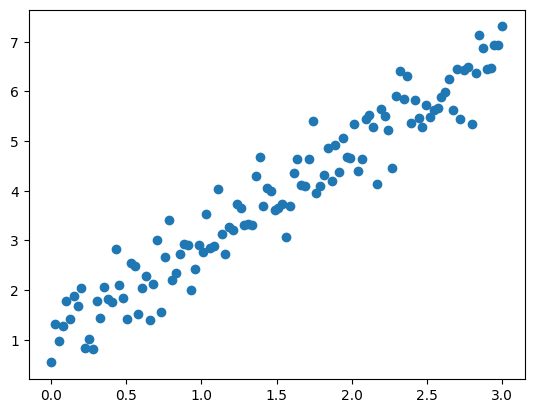

In [50]:
np.random.seed(13) # pick the seed for reproducibility - change it to explore the effects of random variations

train_x = np.linspace(0, 3, 120)
train_labels = 2 * train_x + 0.9 + np.random.randn(*train_x.shape) * 0.5    # at (*train_x.shape), * in the beginning of a function 
                                                                            # is used to unpack the elements of an iterable (e.g., a list, tuple, or array) 
                                                                            # and pass them as separate arguments to a function.
plt.scatter(train_x,train_labels)

In [51]:
# Let's define our model and loss function

input_dim = 1
output_dim = 1
learning_rate = 0.1

# This is our weight matrix
w = torch.tensor([100.0],requires_grad=True,dtype=torch.float32)
# This is our bias vector
b = torch.zeros(size=(output_dim,),requires_grad=True)

def f(x):
    return torch.matmul(x,w) + b

def compute_loss(labels, predictions):
    return torch.mean(torch.square(labels - predictions))

In [52]:
# training the model on a series of minibatches, uing gradient descent

def train_on_batch(x, y):
    predictions = f(x)
    loss = compute_loss(y, predictions)
    loss.backward()
    w.data.sub_(learning_rate * w.grad)
    b.data.sub_(learning_rate * b.grad)
    w.grad.zero_()
    b.grad.zero_()
    return loss

In [53]:
# Shuffle the data.
indices = np.random.permutation(len(train_x))
features = torch.tensor(train_x[indices],dtype=torch.float32)
labels = torch.tensor(train_labels[indices],dtype=torch.float32)


In [54]:
batch_size = 4
for epoch in range(10):
    for i in range(0,len(features),batch_size):
        loss = train_on_batch(features[i:i+batch_size].view(-1,1),labels[i:i+batch_size])   # .view() method is used to reshape a tensor while keeping the same data. 
                                                                                            # -1: It tells PyTorch to compute that dimension such that it maintains the total number of elements.
                                                                                            # 1: This specifies that you want the resulting tensor to have 1 column.
    print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 94.5247
Epoch 1: last batch loss = 9.3428
Epoch 2: last batch loss = 1.4166
Epoch 3: last batch loss = 0.5224
Epoch 4: last batch loss = 0.3807
Epoch 5: last batch loss = 0.3495
Epoch 6: last batch loss = 0.3413
Epoch 7: last batch loss = 0.3390
Epoch 8: last batch loss = 0.3384
Epoch 9: last batch loss = 0.3382


In [55]:
# obtained optimized parameters W and b
#  their values are similar to the original values used when generating the dataset (W = 2, b = 1)
w,b

(tensor([1.8617], requires_grad=True), tensor([1.0711], requires_grad=True))

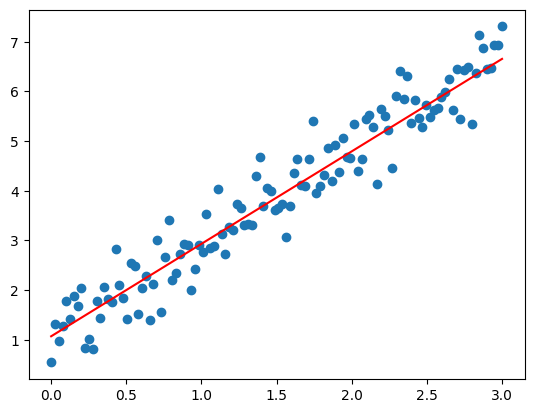

In [56]:
plt.scatter(train_x,train_labels)
x = np.array([min(train_x),max(train_x)])

# Disabling gradient calculation is useful for inference, when you are sure
# that you will not call Tensor.backward(). It will reduce memory consumption for computations that would otherwise have requires_grad=True.
with torch.no_grad():   
    y = w.numpy()*x+b.numpy()
plt.plot(x,y,color='red')